<a href="https://colab.research.google.com/github/varunraj42/Market_lessons/blob/master/Buy_sell_based_on_volumes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
!pip install pandas numpy matplotlib

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [241]:
from google.colab import files
files.upload()

Saving TVSMOTOR.NS.csv to TVSMOTOR.NS.csv


{'TVSMOTOR.NS.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2020-05-26,316.95001220703125,324.79998779296875,310.29998779296875,322.5,320.6611328125,3176276\n2020-05-27,322.0,325.0,308.25,323.04998779296875,321.2079772949219,4252529\n2020-05-28,325.0,337.3999938964844,323.04998779296875,333.1000061035156,331.2007141113281,4800567\n2020-05-29,330.0,344.0,322.3500061035156,335.8999938964844,333.9847412109375,8202596\n2020-06-01,342.0,354.8500061035156,341.04998779296875,352.0,349.9929504394531,4624929\n2020-06-02,349.0,372.95001220703125,348.6000061035156,364.1000061035156,362.0239562988281,7608313\n2020-06-03,371.1000061035156,372.5,352.75,355.54998779296875,353.5226745605469,2931428\n2020-06-04,355.0,363.0,350.3500061035156,355.25,353.2243957519531,2252910\n2020-06-05,359.8500061035156,362.8999938964844,353.6499938964844,359.1499938964844,357.1021728515625,2134564\n2020-06-08,364.8500061035156,368.3500061035156,349.54998779296875,352.75,350.7386779785156,2262737\n2020-06-09,354.5,

In [242]:
infy = pd.read_csv('TVSMOTOR.NS.csv')
# today = pd.DataFrame([['2021-05-25', 1996.40, 1997.00, 1960.00, 1963.15, 1963.15, 6817430]], columns=infy.columns)
# infy = infy.append(today)
infy = infy.set_index(pd.DatetimeIndex(infy['Date'].values))
infy

,Date,Open,High,Low,Close,Adj Close,Volume
2020-05-26,2020-05-26,316.950012,324.799988,310.299988,322.500000,320.661133,3176276
2020-05-27,2020-05-27,322.000000,325.000000,308.250000,323.049988,321.207977,4252529
2020-05-28,2020-05-28,325.000000,337.399994,323.049988,333.100006,331.200714,4800567
2020-05-29,2020-05-29,330.000000,344.000000,322.350006,335.899994,333.984741,8202596
2020-06-01,2020-06-01,342.000000,354.850006,341.049988,352.000000,349.992950,4624929
...,...,...,...,...,...,...,...
2021-05-19,2021-05-19,638.000000,650.000000,633.200012,637.700012,637.700012,2664926
2021-05-20,2021-05-20,634.900024,644.900024,626.299988,627.900024,627.900024,1230302
2021-05-21,2021-05-21,629.950012,635.799988,623.450012,625.000000,625.000000,1073140
2021-05-24,2021-05-24,628.450012,636.900024,618.750000,621.049988,621.049988,1806155


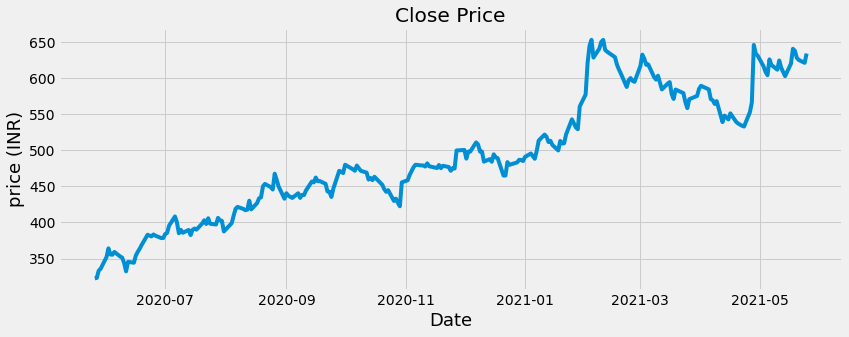

In [243]:
plt.figure(figsize=(12.5, 4.5))
plt.plot(infy['Close'])
plt.title('Close Price')
plt.xlabel('Date', fontsize=18)
plt.ylabel('price (INR)', fontsize=18)
plt.show()

In [244]:
OBV = []
OBV.append(0)

for i in range(1, len(infy['Close'])):  
  if infy['Close'][i] > infy['Close'][i-1]:
    OBV.append(OBV[-1] + infy['Volume'][i])
  elif infy['Close'][i] < infy['Close'][i-1]:
    OBV.append(OBV[-1] - infy['Volume'][i])
  else:
    OBV.append(OBV[-1])

In [245]:
infy['OBV'] = OBV
infy['OBV_EMA'] = infy['OBV'].ewm(span=20).mean()
infy

,Date,Open,High,Low,Close,Adj Close,Volume,OBV,OBV_EMA
2020-05-26,2020-05-26,316.950012,324.799988,310.299988,322.500000,320.661133,3176276,0,0.000000e+00
2020-05-27,2020-05-27,322.000000,325.000000,308.250000,323.049988,321.207977,4252529,4252529,2.232578e+06
2020-05-28,2020-05-28,325.000000,337.399994,323.049988,333.100006,331.200714,4800567,9053096,4.737031e+06
2020-05-29,2020-05-29,330.000000,344.000000,322.350006,335.899994,333.984741,8202596,17255692,8.350975e+06
2020-06-01,2020-06-01,342.000000,354.850006,341.049988,352.000000,349.992950,4624929,21880621,1.162368e+07
...,...,...,...,...,...,...,...,...,...
2021-05-19,2021-05-19,638.000000,650.000000,633.200012,637.700012,637.700012,2664926,150917013,1.431416e+08
2021-05-20,2021-05-20,634.900024,644.900024,626.299988,627.900024,627.900024,1230302,149686711,1.437649e+08
2021-05-21,2021-05-21,629.950012,635.799988,623.450012,625.000000,625.000000,1073140,148613571,1.442267e+08
2021-05-24,2021-05-24,628.450012,636.900024,618.750000,621.049988,621.049988,1806155,146807416,1.444725e+08


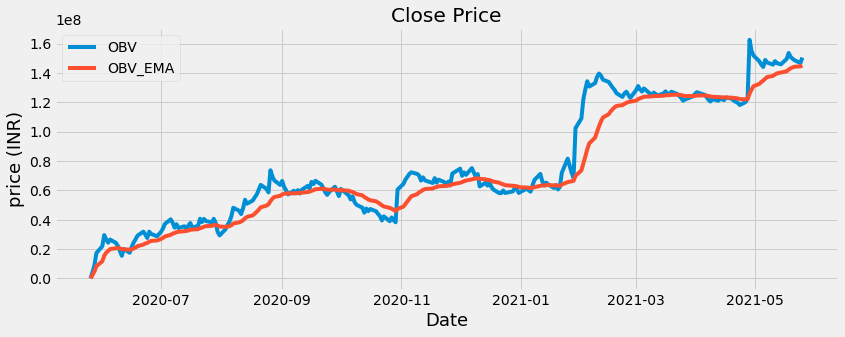

In [246]:
plt.figure(figsize=(12.5, 4.5))
plt.plot(infy['OBV'], label='OBV')
plt.plot(infy['OBV_EMA'], label='OBV_EMA')
plt.title('Close Price')
plt.xlabel('Date', fontsize=18)
plt.ylabel('price (INR)', fontsize=18)
plt.legend()
plt.show()

In [247]:
def buy_sell_price(signal, col1, col2):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1
  for i in range(len(signal)):
    if signal[col1][i] > signal[col2][i] and flag != -1:
      sigPriceBuy.append(signal['Close'][i])
      sigPriceSell.append(np.nan)
      flag = 1
    elif signal[col1][i] < signal[col2][i] and flag != 0:
      sigPriceSell.append(signal['Close'][i])
      sigPriceBuy.append(np.nan)
      flag = 0
    else:
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(np.nan)

  return (sigPriceBuy, sigPriceSell)

In [248]:
x = buy_sell_price(infy, 'OBV', 'OBV_EMA')
infy['buy_signal_price'] = x[0]
infy['sell_signal_price'] = x[1]
infy

,Date,Open,High,Low,Close,Adj Close,Volume,OBV,OBV_EMA,buy_signal_price,sell_signal_price
2020-05-26,2020-05-26,316.950012,324.799988,310.299988,322.500000,320.661133,3176276,0,0.000000e+00,NaN,NaN
2020-05-27,2020-05-27,322.000000,325.000000,308.250000,323.049988,321.207977,4252529,4252529,2.232578e+06,NaN,NaN
2020-05-28,2020-05-28,325.000000,337.399994,323.049988,333.100006,331.200714,4800567,9053096,4.737031e+06,NaN,NaN
2020-05-29,2020-05-29,330.000000,344.000000,322.350006,335.899994,333.984741,8202596,17255692,8.350975e+06,NaN,NaN
2020-06-01,2020-06-01,342.000000,354.850006,341.049988,352.000000,349.992950,4624929,21880621,1.162368e+07,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021-05-19,2021-05-19,638.000000,650.000000,633.200012,637.700012,637.700012,2664926,150917013,1.431416e+08,637.700012,NaN
2021-05-20,2021-05-20,634.900024,644.900024,626.299988,627.900024,627.900024,1230302,149686711,1.437649e+08,627.900024,NaN
2021-05-21,2021-05-21,629.950012,635.799988,623.450012,625.000000,625.000000,1073140,148613571,1.442267e+08,625.000000,NaN
2021-05-24,2021-05-24,628.450012,636.900024,618.750000,621.049988,621.049988,1806155,146807416,1.444725e+08,621.049988,NaN


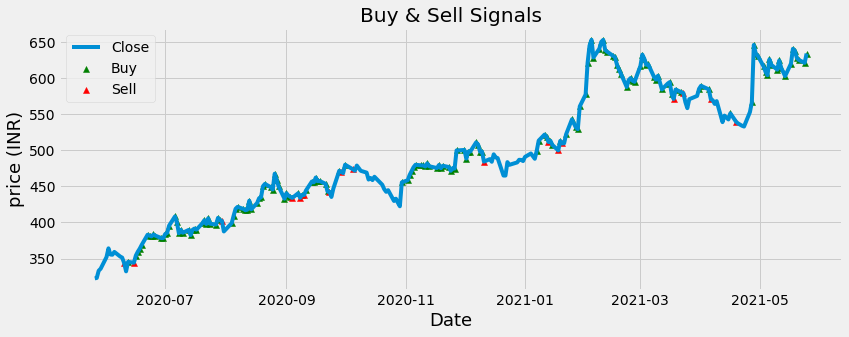

In [249]:
plt.figure(figsize=(12.5, 4.5))
plt.plot(infy['Close'], label='Close')
plt.scatter(infy.index, infy['buy_signal_price'], label='Buy', marker='^', color = 'green')
plt.scatter(infy.index, infy['sell_signal_price'], label='Sell', marker='^', color = 'red')
plt.title('Buy & Sell Signals')
plt.xlabel('Date', fontsize=18)
plt.ylabel('price (INR)', fontsize=18)
plt.legend()
plt.show()

In [250]:
infy.loc[infy['buy_signal_price'].notnull()].tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume,OBV,OBV_EMA,buy_signal_price,sell_signal_price
2021-05-11,2021-05-11,610.950012,629.700012,605.500000,624.299988,624.299988,2354770,148018017,1.389240e+08,624.299988,NaN
2021-05-12,2021-05-12,629.299988,629.299988,611.000000,614.200012,614.200012,1330572,146687445,1.396634e+08,614.200012,NaN
2021-05-14,2021-05-14,618.000000,619.900024,600.000000,602.599976,602.599976,850697,145836748,1.402513e+08,602.599976,NaN
2021-05-17,2021-05-17,608.000000,631.200012,595.000000,619.950012,619.950012,3724394,149561142,1.411380e+08,619.950012,NaN
2021-05-18,2021-05-18,622.500000,645.000000,617.799988,640.450012,640.450012,4020797,153581939,1.423231e+08,640.450012,NaN
2021-05-19,2021-05-19,638.000000,650.000000,633.200012,637.700012,637.700012,2664926,150917013,1.431416e+08,637.700012,NaN
2021-05-20,2021-05-20,634.900024,644.900024,626.299988,627.900024,627.900024,1230302,149686711,1.437649e+08,627.900024,NaN
2021-05-21,2021-05-21,629.950012,635.799988,623.450012,625.000000,625.000000,1073140,148613571,1.442267e+08,625.000000,NaN
2021-05-24,2021-05-24,628.450012,636.900024,618.750000,621.049988,621.049988,1806155,146807416,1.444725e+08,621.049988,NaN
2021-05-25,2021-05-25,628.450012,642.000000,624.049988,633.900024,633.900024,3680287,150487703,1.450454e+08,633.900024,NaN


In [251]:
infy.loc[infy['sell_signal_price'].notnull()].tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume,OBV,OBV_EMA,buy_signal_price,sell_signal_price
2020-09-29,2020-09-29,475.000000,480.950012,468.200012,470.250000,467.568665,3186583,59249552,6.040465e+07,NaN,470.250000
2020-10-05,2020-10-05,485.000000,485.200012,464.950012,473.549988,470.849854,4368513,56579545,5.974849e+07,NaN,473.549988
2020-12-11,2020-12-11,505.500000,513.349976,478.600006,484.200012,481.439178,8424113,62651888,6.777409e+07,NaN,484.200012
2021-01-13,2021-01-13,518.000000,526.549988,507.000000,511.350006,508.434326,2964843,63249378,6.334354e+07,NaN,511.350006
2021-01-18,2021-01-18,506.799988,506.799988,488.600006,499.700012,496.850800,2431492,61587818,6.338231e+07,NaN,499.700012
2021-01-20,2021-01-20,515.450012,521.900024,507.000000,509.350006,506.445740,3038458,60601605,6.313969e+07,NaN,509.350006
2021-03-18,2021-03-18,582.000000,586.950012,565.000000,571.000000,569.599121,1285083,124843542,1.248704e+08,NaN,571.000000
2021-03-23,2021-03-23,580.000000,586.349976,575.250000,579.049988,577.629395,1240534,124422713,1.250778e+08,NaN,579.049988
2021-04-06,2021-04-06,589.000000,590.500000,568.000000,570.799988,570.799988,1462689,123615494,1.245584e+08,NaN,570.799988
2021-04-19,2021-04-19,542.200012,542.200012,527.799988,539.200012,539.200012,1029456,122311192,1.231403e+08,NaN,539.200012


In [252]:
infy.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume,OBV,OBV_EMA,buy_signal_price,sell_signal_price
2021-05-11,2021-05-11,610.950012,629.700012,605.500000,624.299988,624.299988,2354770,148018017,1.389240e+08,624.299988,NaN
2021-05-12,2021-05-12,629.299988,629.299988,611.000000,614.200012,614.200012,1330572,146687445,1.396634e+08,614.200012,NaN
2021-05-14,2021-05-14,618.000000,619.900024,600.000000,602.599976,602.599976,850697,145836748,1.402513e+08,602.599976,NaN
2021-05-17,2021-05-17,608.000000,631.200012,595.000000,619.950012,619.950012,3724394,149561142,1.411380e+08,619.950012,NaN
2021-05-18,2021-05-18,622.500000,645.000000,617.799988,640.450012,640.450012,4020797,153581939,1.423231e+08,640.450012,NaN
2021-05-19,2021-05-19,638.000000,650.000000,633.200012,637.700012,637.700012,2664926,150917013,1.431416e+08,637.700012,NaN
2021-05-20,2021-05-20,634.900024,644.900024,626.299988,627.900024,627.900024,1230302,149686711,1.437649e+08,627.900024,NaN
2021-05-21,2021-05-21,629.950012,635.799988,623.450012,625.000000,625.000000,1073140,148613571,1.442267e+08,625.000000,NaN
2021-05-24,2021-05-24,628.450012,636.900024,618.750000,621.049988,621.049988,1806155,146807416,1.444725e+08,621.049988,NaN
2021-05-25,2021-05-25,628.450012,642.000000,624.049988,633.900024,633.900024,3680287,150487703,1.450454e+08,633.900024,NaN
